# DT2470 Lab 01: Teh Signal Processings

by Bob L. T. Sturm

In this first lab you will practice some fundamental concepts of signal processing. You will analyse a chosen sampled sound in the time-, frequency-, and time-frequency domains. You will write something intelligent about your analysis, observing things like periodicity, frequency content, harmonicity, etc. You will also learn to extract low-level features from audio and music signals. In the next lab, you will use these features for some machine learning madness.

The lab report you submit should be a testament to your intelligence, as well as a reflection of your willingness to be a part of this module. You are free to use whatever software you want, e.g., python, MATLAB, Processing, C++, etc. But I give tips below in python. Here's some helpful links as well:

- [Numpy API](https://docs.scipy.org/doc/numpy-1.13.0/index.html)
- [Scikit-learn API](https://scikit-learn.org/stable/)
- [MatPlotlib API](https://matplotlib.org/3.1.1/api/index.html)
- [Numpy Cheat Sheet](https://www.dataquest.io/blog/numpy-cheat-sheet/)
- [Pydub API](https://github.com/jiaaro/pydub/blob/master/API.markdown)

I also include some images so you can confirm whether you are on the right track, or just to have a brief pause to laugh at how far your answer is from being correct.

# Part 1: Basics

1. Choose an audio file to work with from http://bbcsfx.acropolis.org.uk. Download it, load it using pydub (see [pydub.AudioSegment](https://github.com/jiaaro/pydub/blob/master/API.markdown)), and plot a portion of the waveform with the appropriate axes labeled "Amplitude" and "Time (s)". The time axis **must be** in seconds. (Use the sample rate of your soundfile to find that.) If your audio file has more than one channel, just look at one channel.

> Below is the first 10 seconds of my selected audio waveform. Yours should appear nearly as beautiful.
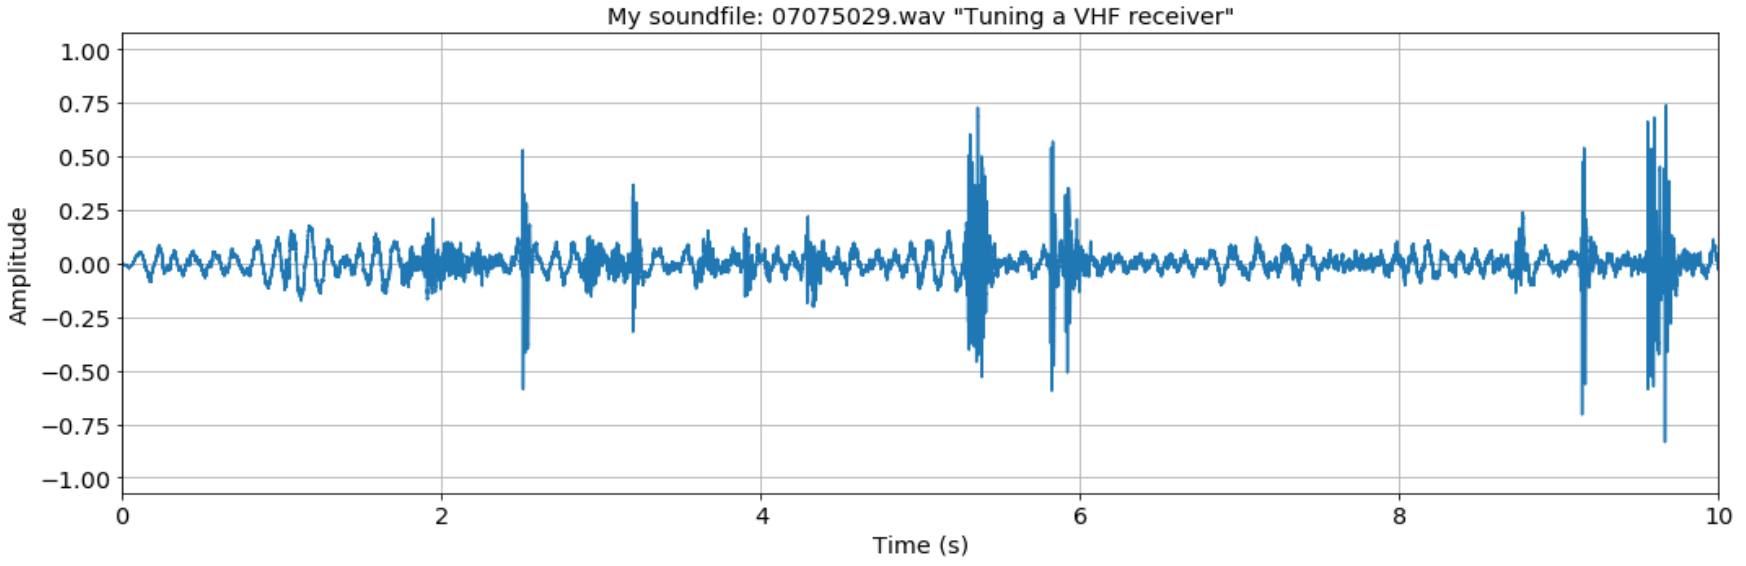

In [1]:
# Here is a how I download an audio file 
import wget
import os

print(os.getcwdb())

path = str(os.getcwdb())[2:-1]
#path = ''

print(path)
#path = ''

snd_dir = path + '/tmp/snd'

if not os.path.exists(snd_dir):
    os.makedirs(snd_dir)
#!wget --quiet -P /tmp/snd/ http://bbcsfx.acropolis.org.uk/assets/07075029.wav
#!curl -s -P /tmp/snd/ http://bbcsfx.acropolis.org.uk/assets/07075029.wav

url = 'https://sound-effects-media.bbcrewind.co.uk/zip/07042033.wav.zip?download'
file = wget.download(url, snd_dir)

filename = '07042033.wav'

from zipfile import ZipFile

# unzipping
zip = ZipFile(file)
zip.extractall(snd_dir)
zip.close

b'C:\\Users\\sergi\\Desktop\\Music Informatics\\Lab1'
C:\\Users\\sergi\\Desktop\\Music Informatics\\Lab1
100% [..........................................................................] 7381337 / 7381337

<bound method ZipFile.close of <zipfile.ZipFile filename='C:\\\\Users\\\\sergi\\\\Desktop\\\\Music Informatics\\\\Lab1/tmp/snd/bbc_british-bi_07042033 (1).zip' mode='r'>>

In [2]:
import pydub
sound = pydub.AudioSegment.from_file(snd_dir + '/' + filename, format="wav")

In [3]:
sound

In [4]:
sound = sound[:]

In [5]:
sound.channels
dir(sound)

['DEFAULT_CODECS',
 '__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_data',
 '_from_safe_wav',
 '_parse_position',
 '_repr_html_',
 '_spawn',
 '_sync',
 'append',
 'apply_gain',
 'apply_gain_stereo',
 'apply_mono_filter_to_each_channel',
 'array_type',
 'channels',
 'compress_dynamic_range',
 'converter',
 'dBFS',
 'duration_seconds',
 'empty',
 'export',
 'fade',
 'fade_in',
 'fade_out',
 'ffmpeg',
 'frame_count',
 'frame_rate',
 'frame_width',
 'from_file',
 'from_file_using_temporary_files',
 'from_flv',
 'from_mono_audiosegments',
 'from_mp3',
 'from_ogg',
 'from_raw',
 'from_

In [6]:
sound_mono = sound.split_to_mono()

In [7]:
sound_mono[0]

In [8]:
samples = [[], []]
samples[0] = sound_mono[0].get_array_of_samples()
samples[1] = sound_mono[1].get_array_of_samples()

Text(0.5, 1.0, 'Soundfile 07042033.wav - British Bridls - Channel 1')

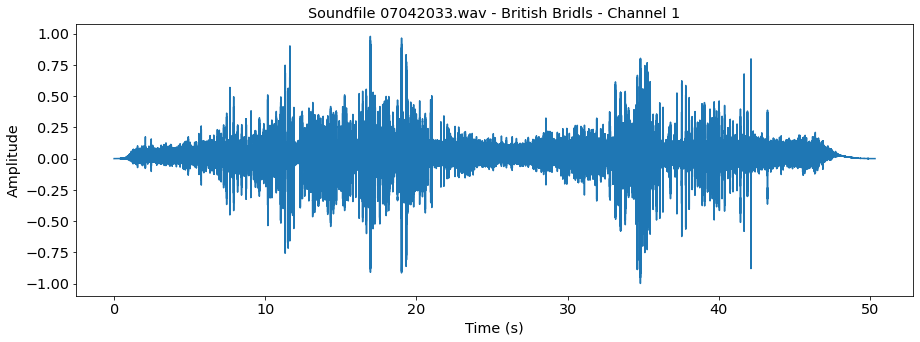

In [9]:
# Now we plot the entire audio file
import matplotlib.pyplot as plt
import numpy as np

print(sound)

# The following makes the plot look nice
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# add your code below

ind = 1

duration = sound_mono[ind].duration_seconds
sample_rate = sound_mono[ind].frame_rate
max_possible_amplitude = sound_mono[ind].max_possible_amplitude

time_axis = np.arange(0, duration, 1/sample_rate)
plt.plot(time_axis, np.array(samples[ind]) / max_possible_amplitude)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title(f"Soundfile {filename} - British Bridls - Channel {ind}")


2. With the audio file you have chosen, zoom into two different 100 ms portions that have audio data and plot them. 

>Below is what mine looks like. We can see the sound appears quite different at both times. At  about 2500 ms we see a sudden rise that decays and oscillates. At about 26 s we see a noisy waveform that has a small amplitude. 

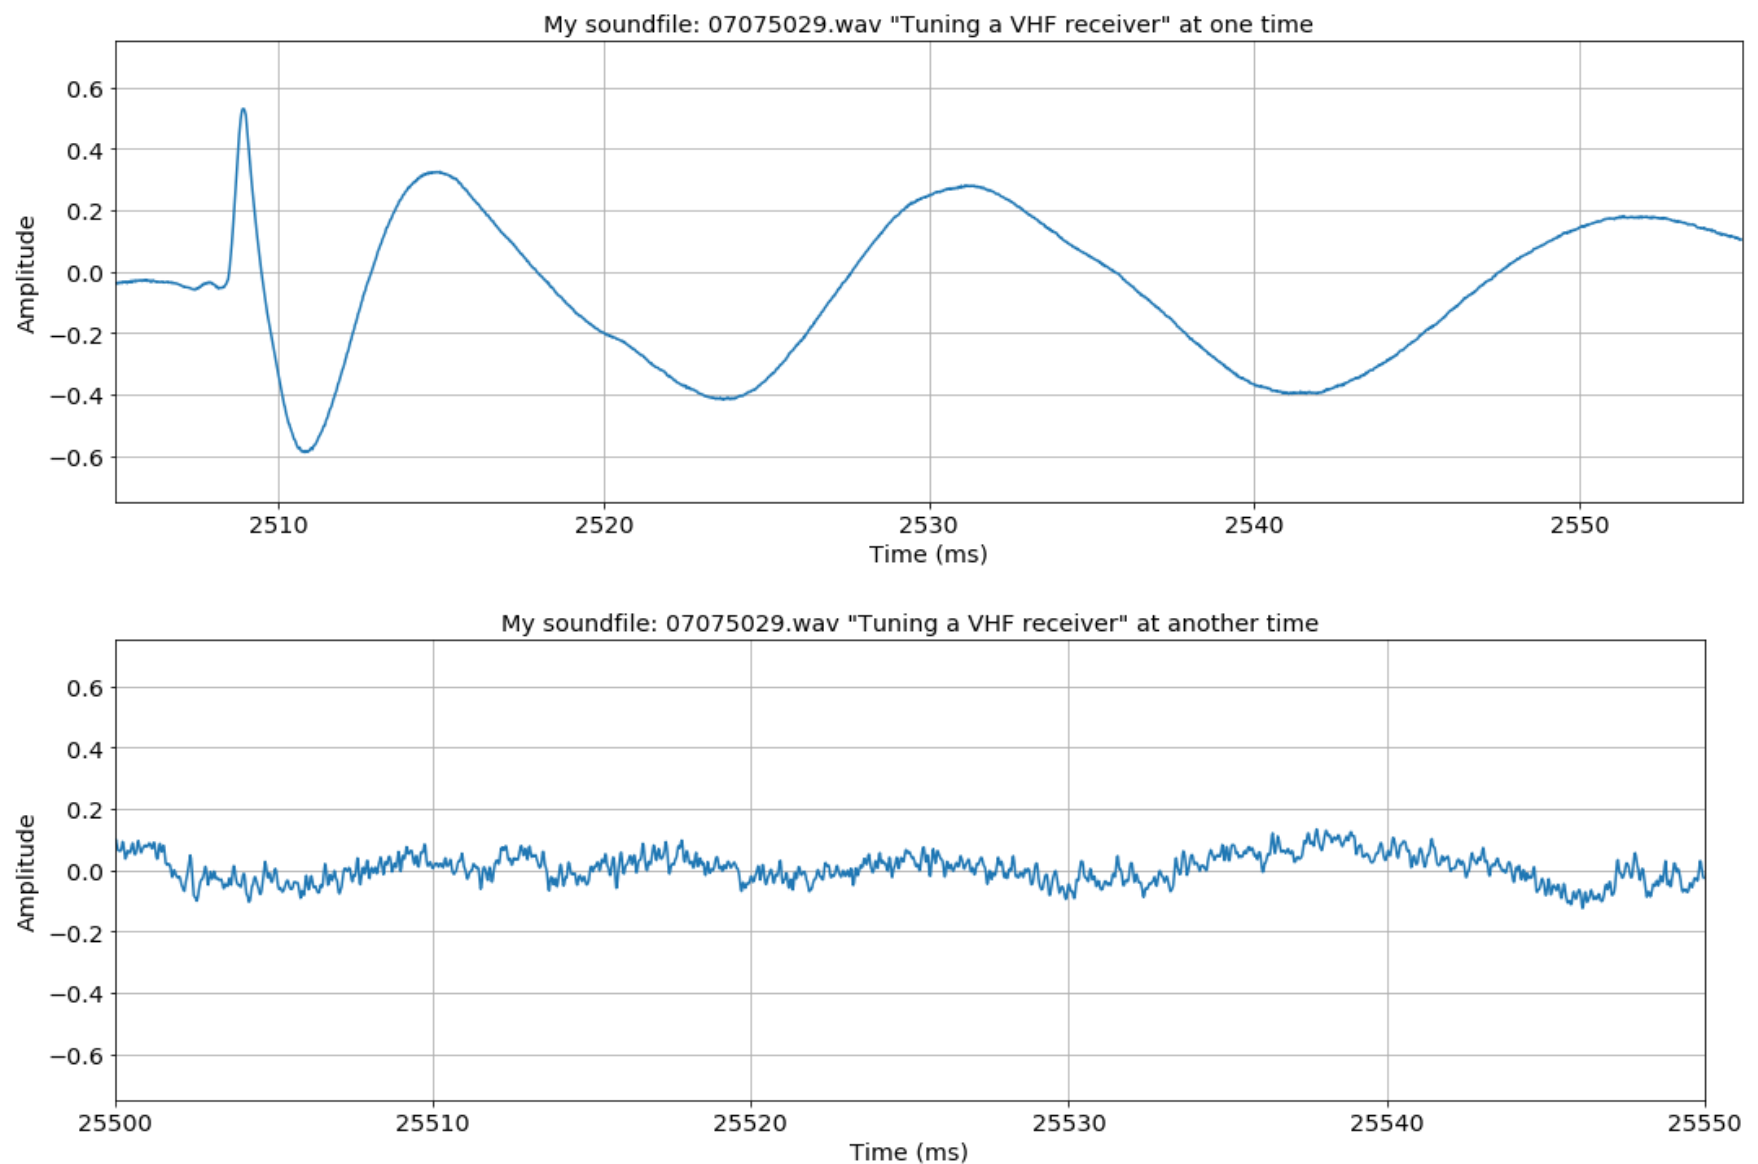

Text(0.5, 1.0, 'Soundfile 07042033.wav - British Bridls - Channel 1')

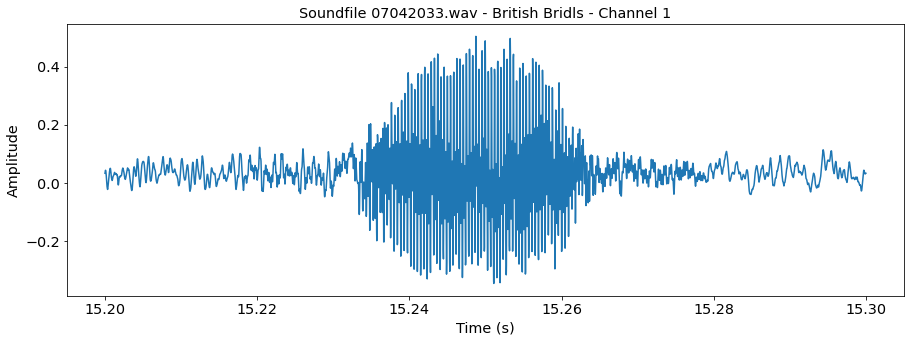

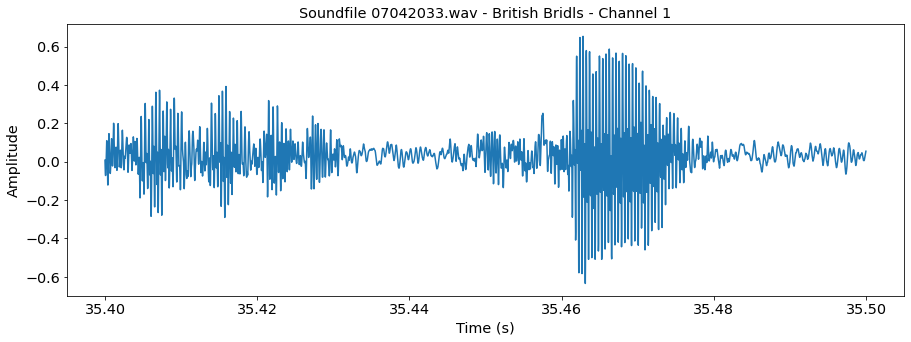

In [10]:
# add your code below

def Slice(time_axis, samples, time_interval, time_0):

    #time_interval = 0.1
    num_samples = int(time_interval*sample_rate)
    
    #time_0 = 22
    sample_0 = int(time_0*sample_rate)

    time_slice = time_axis[sample_0 : sample_0 + num_samples]
    samples_slice = np.array(samples[sample_0 : sample_0 + num_samples])
    
    return time_slice, samples_slice


fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

time_interval = 0.1

time_0_1 = 15.2
time_0_2 = 35.4

slice1 = Slice(time_axis, np.array(samples[0]) / max_possible_amplitude, time_interval, time_0_1)
slice2 = Slice(time_axis, np.array(samples[0]) / max_possible_amplitude, time_interval, time_0_2)

ax1.plot(slice1[0], slice1[1])
ax1.set_xlabel(r"Time (s)")
ax1.set_ylabel(r"Amplitude")
ax1.set_title(f"Soundfile {filename} - British Bridls - Channel {ind}")

ax2.plot(slice2[0], slice2[1])
ax2.set_xlabel(r"Time (s)")
ax2.set_ylabel(r"Amplitude")
ax2.set_title(f"Soundfile {filename} - British Bridls - Channel {ind}")

3. For each of the segments you looked at above, window them, and compute their Fourier transforms. Plot their dB magnitude spectra. Appropriately label your axes with "Magnitude (dB)" and "Frequency (kHz)". The frequency axis **must be** in kiloHertz, and limited to 0 to the Nyquist frequency (half the sampling rate). Window the audio with 1) boxcar, or 2) Hann. (This means you will have create four plots in total , or two plots with two lines each.)

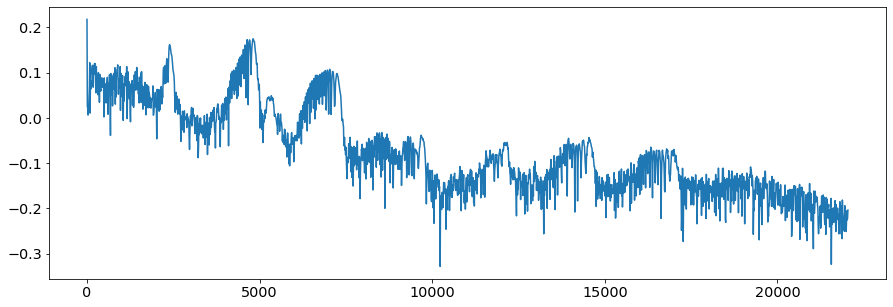

In [68]:
# add your code below

from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt


def windowed_FFT(window, sample, num_samples, time_interval, n=None):
    
    FFT_window_sample = fft(np.multiply(signal.get_window(window, num_samples), sample), n)
    
    magnitude = np.abs(FFT_window_sample)
    phase = np.angle(FFT_window_sample)
    
    return magnitude, phase
    
    
nyquist = sample_rate / 2
nyquist_ind = int(sample_rate / 2 * time_interval)

frequencies = (1/ time_interval) * np.arange(0, nyquist_ind, 1)

magnitude, phase = windowed_FFT("boxcar", slice1[1], len(slice1[1]), 0.1)
plt.plot(frequencies, np.log10(magnitude[:nyquist_ind])/10)

C:\Users\sergi\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


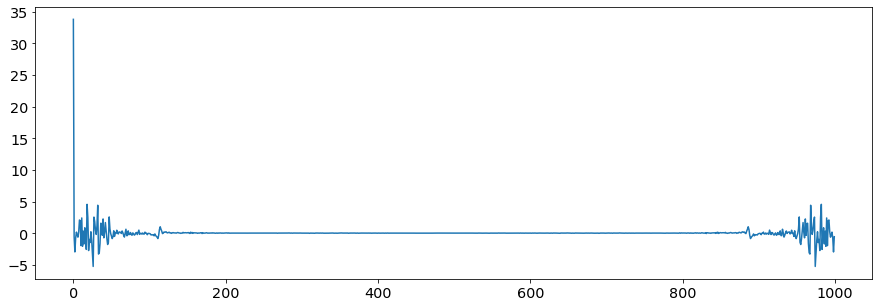

In [69]:
plt.plot(fft(slice1[1], n=1000))

4. For the first 10 seconds of your audio file, compute and plot its dB magnitude short-time Fourier transform using a Hann window of duration 25 ms with a window hopsize of 10 ms, and an FFT size of 8192 samples. Do the same using a Hann window of duration 100 ms with a window hopsize of 10 ms. Appropriately label your axes with "Frequency (kHz)" and "Time (s)". The frequency axis must be in kiloHertz, and limited to 0 to 5 kHz. The time axis must be in seconds. Choose a colormap that you feel describes your personality (https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html). See [scipy.signal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html) for help.

In [85]:
# add your code below

sample = np.array(samples[0]) / max_possible_amplitude

time_final = 10
time_final_ind = int(time_final * sample_rate)

sample = sample[0 : time_final_ind]

window_duration = 0.25
window_hopsize = 0.1

window_duration_ind = int( window_duration * sample_rate)
window_hopsize_ind = int( window_hopsize * sample_rate)

FFT_size = 8192

n_windows = int(time_final_ind / window_duration_ind)


Magnitudes = []
Phases = []

for i in range(n_windows):
    
    window_slice = sample[i*window_duration_ind : (i+1)*window_duration_ind]
    
    FFT_window_magnitude, FFT_window_phase = windowed_FFT("hann", window_slice, len(window_slice), window_duration, n=8192)
    
    Magnitudes.append(FFT_window_magnitude[:4096])
    Phases.append(FFT_window_phase[:4096])

(4096, 40)
(4096, 40)


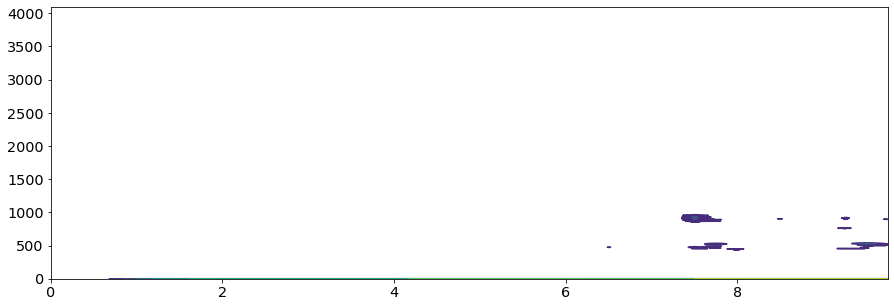

In [104]:
x = window_duration * np.arange(0, n_windows, 1)
y = np.arange(0, len(Magnitudes[0]), 1)

x, y = np.meshgrid(x,y)

Magnitudes = np.array(Magnitudes)

print(np.shape(x))
print(np.shape(y))

plt.contour(x,y, np.transpose(Magnitudes))

5. Describe some of the advantages and nackdelar of using short or long time windows for time-frequency analysis.


6. For the first 10 seconds of your audio file, use the [librosa package](https://github.com/librosa) to compute its Mel spectrogram using Hann windows of duration 25 ms with a window hopsize of 10 ms. Use 128 Mel bands and an FFT size of 8192 samples. Display the dB magnitude with reference to the max power observed, and limit your y-axis between 0 and 5 kHz. Use the same colormap as you used above. See https://github.com/librosa/librosa/blob/main/examples/LibROSA%20demo.ipynb for help. 

In [ ]:
import librosa
import librosa.display

# add your code below


# Part 2: Extracting features

1. Write a function that will take in the samples of an audio file, a frame size in samples, a frame hop size in samples, and compute and return the number of waveform zero crossings in each frame. A waveform x[n] undergoes a zero crossing when sign(x[n]) and sign(x[n+1]) are different. You will have to slice x[n] into chunks of a specified size, and for each of those chunks, count the number of sign changes.

In [ ]:
# add your code below


2. Using your function, compute zero crossings of 46 ms frames hopped 50% of that for the audio file you used in part 1. (Ignore any frames at the end of audio files that are less than that length.) Plot the first 10 seconds of your time domain waveform, and plot the series of zero crossings you extracted.

In [ ]:
# add your code below


3. Write a function that will take in the samples of an audio file, a frame size in samples, a hop size in samples, and a sampling rate, and compute and return the spectral centroid of each frame. The spectral centroid of a rectangular window of audio $x[n]$ of length $N$ (even) is defined as 
$$ R_{0.5}(x) = \frac{\sum_{k=0}^{N/2+1} \frac{F_s k}{N} |X[k]|}{\sum_{k=0}^{N/2+1} |X[k]|} $$
where $X[k]$ is the DFT of $x[n]$, and $F_s$ is the sampling rate.

In [ ]:
# add your code below


4. Using your function, compute spectral centroid features for contiguous 46 ms frames hopped 50% for the audio file you used in part 1. (Ignore any frames at the end of audio files that are less than that length.) Plot the first 10 seconds of your time domain waveform, and plot the series of spectral centroids you extracted.

In [ ]:
# add your code below


5. Using the librosa package (https://github.com/librosa), extract the first 10 MFCC features from your audio file using Hann windows of 25 ms duration and 10 ms hop size, and an FFT size of 8192 samples. Display the extracted MFCCs for the first 10 seconds.

In [ ]:
# add your code below
